In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../data/titanic.csv')

le = LabelEncoder()
le.fit(df['Sex'])
df['Sex_Binary'] = le.transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


**Goal**
- Create a model using Decision Trees that estimates Survived (target / label / class) using numerical columns in the dataframe as features.

In [99]:
df_no_na = df[['Survived', 'Sex_Binary', 'Pclass', 'Age', 'SibSp', 'Parch']].dropna()
X = df_no_na[['Sex_Binary', 'Pclass', 'Age', 'SibSp', 'Parch']]
y = df_no_na['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)

In [82]:
# plt.figure(figsize=(24,6))
# plot_tree(clf, fontsize=8);

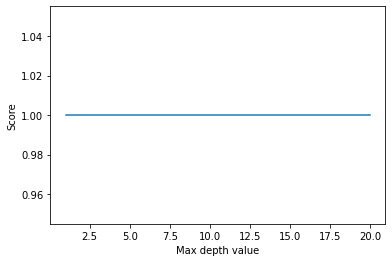

In [83]:
max_depths = range(1,21,1)
scores = []
for md in max_depths:
    clf = DecisionTreeClassifier(max_depth=md, random_state=0)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    
plt.plot(max_depths, scores)
plt.xlabel('Max depth value')
plt.ylabel('Score');

In [84]:
# Best md = 4
best_clf = DecisionTreeClassifier(max_depth=4, random_state=95)
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[79,  0],
       [ 0, 64]])

### Random forest
- Collection of decision trees with small depth
- Prediction (y) is the aggregated predicition of each individual estimator (i.e. trees with small depth)

In [88]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [89]:
rf.feature_importances_

array([0.79301918, 0.11007069, 0.04416089, 0.03117921, 0.00998737,
       0.01158267])

In [91]:
rf.feature_names_in_

array(['Survived', 'Sex_Binary', 'Pclass', 'Age', 'SibSp', 'Parch'],
      dtype=object)

### Grid Search Cross-Validation
- Technique to iterate over different possible configurations of a model (`max_depth` for decision trees and `max_depth`/`n_estimators` in the case of random forests).

In [111]:
param_grid = {'max_depth': range(4, 13, 2), 'n_estimators': range(100, 181, 20), 'random_state': [0]}
grid = GridSearchCV(RandomForestClassifier(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(4, 13, 2),
                         'n_estimators': range(100, 181, 20),
                         'random_state': [0]})

In [113]:
grid.score(X_test, y_test)

0.8181818181818182

In [115]:
grid.best_score_

0.8266666666666668

In [117]:
grid.score(X_train, y_train)

0.840630472854641

In [119]:
grid.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=180, random_state=0)

In [120]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 180, 'random_state': 0}